# Linear Regression in Python Using `sklearn`

**Source**: https://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# needed to split the data into training and testing
from sklearn.model_selection import train_test_split

# needed to train and fit a linear regression model
from sklearn.linear_model import LinearRegression

# needed to evaluate the model
from sklearn.metrics import mean_squared_error

In this module, we will predict the miles per gallon (mpg) for cars using their physical attributes.

## Step 1: prepare the data

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# drop the variable car name
df = df.drop('car name', axis = 1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# check for missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [43]:
# the variable horse power has ? has missig value

df.isin(['?']).any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [44]:
# replace ? with missig value NaN in horse power variable

df['horsepower'] = df['horsepower'].replace({'?':np.NaN})

In [45]:
# drop all rows with missing values

df = df.dropna()

In [46]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Also note that the column "origin" is where the car came from and this is an ordinal categorical variable so we will need to create the dummy binary variables for this:

In [47]:
df['origin'] = df['origin'].replace({1:'america', 2:'europe',3:'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [48]:
df = pd.get_dummies(df, columns = ['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## Step 2: split the data

We will need to split the dataset into training and testing data. This will help us assessing our model and avoid overfitting. 

The training data is used to train the linear regression model, and the testing data is needed to assess and evaluate the linear regression model. 

We usually split the data into 75% training and 25% testing.

We usually use the variable name `X` (capital X) to save all predictor variables, and the variable `y` (lower case y) to save the target variable. This is mainly to reflect the linear algebra terminology for the matrix of predictors and the vector of target variable. 

In [49]:
# Save the predictor variables in X

X = df.drop('mpg', axis = 1) #mpg is the target variable
y = df['mpg']

In [50]:
# split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


## Step 3: train the model using the training data

In [52]:
# create the backbone linear regression model
model = LinearRegression()
# fit the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.coef_

array([-0.24633756,  0.02387034, -0.00601724, -0.00733643,  0.21897778,
        0.78518011, -1.76249341,  0.80962692,  0.95286649])

In [54]:
# More details on the function enumerate: https://book.pythontips.com/en/latest/enumerate.html

# regression coefficients for each variable
for i,col in enumerate(X_train.columns):
    print(col + '\t: ', round(model.coef_[i],2))

cylinders	:  -0.25
displacement	:  0.02
horsepower	:  -0.01
weight	:  -0.01
acceleration	:  0.22
model year	:  0.79
origin_america	:  -1.76
origin_asia	:  0.81
origin_europe	:  0.95


In [56]:
# the model intercept

model.intercept_


-19.80918384881591

Model: 

$Y = -19.81 - 0.25\times cylinders + 0.02 \times displacement - 0.01 \times horsepower 
     - 0.01 \times weight + 0.22 \times acceleration + 0.79 \times model year 
     - 1.76 \times origin america + 0.81 \times origin asia + 0.95 \times origin europe$ 

## Step 4: evaluating the model using testing data

In [57]:
# What is the R-squared for the model?

# Almost 83% of the variability in the traget variable y (miles per gallon) is explained
# by all predictor variables X using our model
model.score(X_test,y_test)

0.8285231316459775

In [58]:
# What is the mean squared error MSE?

y_predict = model.predict(X_test)

MSE = mean_squared_error(y_predict,y_test)
MSE

12.23096383460266

In [59]:
# The MSE is the averaged squared distance 
# between the actual values and the predicted values 

((y_test-y_predict)**2).mean()

12.23096383460266

In [60]:
import math

math.sqrt(MSE)

3.497279490490095

This tells us that on average, we are 3.5 mpg far from the ground truth or the actual mpg when making predictions on our test dataset.

### Predicted vs. Actual Scatterplot

In [63]:
data = pd.DataFrame({'Model Predictions': y_predict,
                    'True Value': y_test})

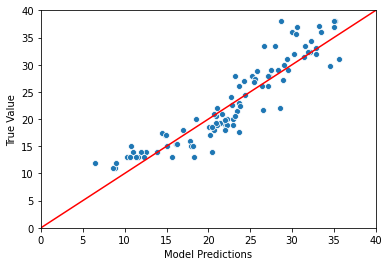

In [65]:
sns.scatterplot(data= data, x='Model Predictions', y='True Value')

plt.xlim(0,40)
plt.ylim(0,40)
plt.plot([0,40],[0,40],color='red')

## Step 5: making predictions

We can use our model to predict the miles per gallon for another, unseen car by the model. Let’s give it a go on the following:

- Cylinders : 4
- Displacement : 121
- Horesepower: 110
- Weight: 2800
- Acceleration: 15.4
- Year: 81
- Origin: Asia


In [66]:
model.predict([[4,121,110,2800,15.4,81,0,1,0]])

array([28.6713418])

This tells us the our model predicts that the above mentioned car is predicted to have around 28.5 miles per gallon.